Importación CSV data_books desde Kaggle

In [1]:
# import libraries

import pandas as pd


import numpy as np

import warnings
warnings.filterwarnings ('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import seaborn as sns

import matplotlib.pyplot as plt

In [22]:
#import csv and creat a copy of the original df

comedoresmadrid_ori = pd.read_csv('../ETL-Project/data/servicios_sociales_registro_centros.csv',
                                  encoding = 'latin1', on_bad_lines='skip',sep=';')

comedoresmadrid = comedoresmadrid_ori.copy()

In [30]:
comedoresmadrid.head()

,numero_registro,denominacion,plazas_autorizadas_numero,plazas_descripcion,tipologia,subtipo,sector,municipio_codigo,municipio_nombre,direccion_via_tipo,direccion_via_codigo,direccion_via_nombre,direccion_portal,direccion_coor_x,direccion_coor_y,direccion_codigo_postal,contacto_telefono,entidad_denominacion,entidad_cif,entidad_naturaleza
0,C0003,CENTRO DE REHABILITACION LABORAL NUEVA VIDA,40,Capacidad máxima simultánea,CENTROS DE REHABILITACIÓN,CENTROS DE REHABILITACIÓN: OTROS,Personas con enfermedad mental crónica,079,Madrid,CALLE,01394,de Colomer,14,443535,4475980,28028,91355 26 80,ASOCIACION PSIQUIATRIA Y VIDA,G28727261,PRIVADA SIN ÁNIMO DE LUCRO
1,C0005,"NTRA. SRA. DE FATIMA, RESIDENCIA DE PERSONAS M...",96,Plazas totales,CENTROS RESIDENCIALES,RESIDENCIAS DE PERSONAS MAYORES DEPENDIENTES,Personas mayores,061,Galapagar,CALLE,A0502,Procesiones,44,414969,4491768,28260,91 858 42 40,"RESIDENCIA FATIMA, S.L.",B79025193,PRIVADA CON ÁNIMO DE LUCRO
2,C0007,"SAN CAMILO, RESIDENCIA DE PERSONAS MAYORES",144,Plazas totales,CENTROS RESIDENCIALES,RESIDENCIAS DE PERSONAS MAYORES DEPENDIENTES,Personas mayores,903,Tres Cantos,SECT,00008,Escultores,39,439492,4496185,28760,91 803 40 00,RR. CAMILOS-RESIDENCIA ASISTIDA SAN CAMILO,R2800714D,PRIVADA SIN ÁNIMO DE LUCRO
3,C0010,"NUEVA EDAD, CENTRO DE DIA",60,Capacidad máxima simultánea,CENTROS DE DÍA,CENTROS DE DÍA: OTROS,Personas mayores,079,Madrid,CALLE,09814,de Martínez Villergas,6,444628,4476573,28027,914 033 131/902 095 902,ASOCIACION SERVICIO INTEGRAL SECTORIAL PARA AN...,G28702504,PRIVADA SIN ÁNIMO DE LUCRO
4,C0018,"MADRE MARAVILLAS, RESIDENCIA DE PERSONAS MAYORES",54,Plazas totales,CENTROS RESIDENCIALES,RESIDENCIAS DE PERSONAS MAYORES DEPENDIENTES,Personas mayores,065,Getafe,PLAZA,A0384,de la Iglesia,1,444151,4463737,28909,91 684 70 85,"CENTRO GERIATRICO MADRE MARAVILLAS, S.A.",A78679669,PRIVADA CON ÁNIMO DE LUCRO


In [27]:
comedoresmadrid.tipologia.unique()

array(['CENTROS DE REHABILITACIÓN', 'CENTROS RESIDENCIALES',
       'CENTROS DE DÍA', 'CENTROS OCUPACIONALES', 'CENTROS DE ACOGIDA',
       'CENTROS EXPERIMENTALES O NO CLASIFICADOS'], dtype=object)

In [32]:
comedoresmadrid.sector.unique()

array(['Personas con enfermedad mental crónica', 'Personas mayores',
       'Personas sin hogar', 'Mujer', 'Infancia y Adolescencia',
       'Personas con discapacidad intelectual', 'Familia',
       'Personas con discapacidad física', 'Presos y ex reclusos',
       'Infancia', 'Adolescencia', 'Conjunto de la población',
       'Otros grupos en situación de necesidad',
       '(Inmigracion) Otros grupos en situación de necesidad',
       'Refugiados y asilados', 'Colectivos en situación de necesidad'],
      dtype=object)

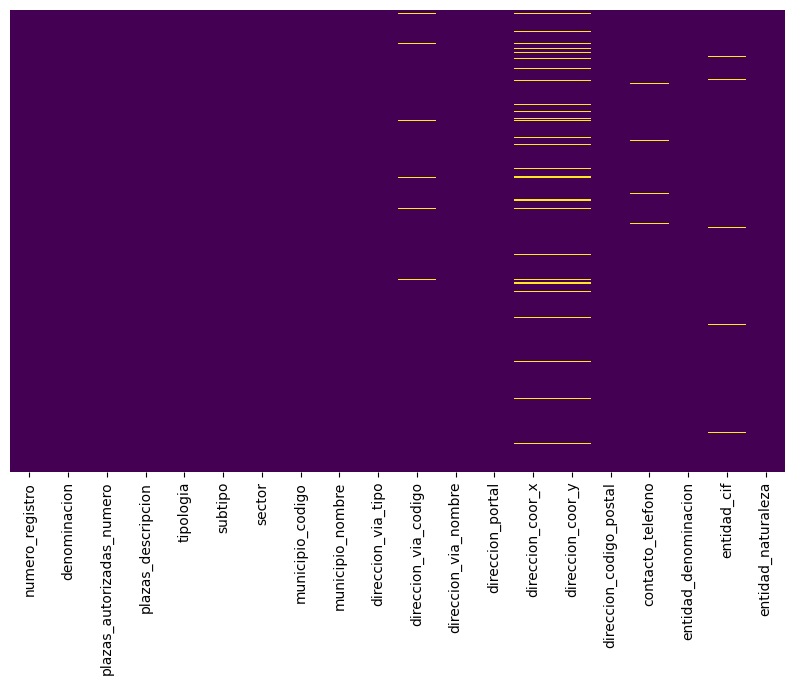

In [33]:
plt.figure(figsize=(10, 6))  

sns.heatmap(comedoresmadrid.isna(),   
            yticklabels=False,
            cmap='viridis',
            cbar=False
           )

plt.show();

In [36]:
busquedacomedores = comedoresmadrid[comedoresmadrid.apply(lambda x: 'comedor' in ' '.join(x.astype(str)), axis=1)]

busquedacomedores

,numero_registro,denominacion,plazas_autorizadas_numero,plazas_descripcion,tipologia,subtipo,sector,municipio_codigo,municipio_nombre,direccion_via_tipo,direccion_via_codigo,direccion_via_nombre,direccion_portal,direccion_coor_x,direccion_coor_y,direccion_codigo_postal,contacto_telefono,entidad_denominacion,entidad_cif,entidad_naturaleza


In [39]:
import requests
from bs4 import BeautifulSoup

# Hacer una solicitud a la página web con los comedores sociales
url = 'https://www.google.es/maps/search/comedores+sociales+madrid/@40.4647197,-3.6987309,13z?hl=es'
googlemaps = requests.get(url)


    
    
googlemaps

<Response [200]>

In [ ]:
# Buscar en el HTML todas las entradas de comedor social
comedores = soup.find_all("div", class_="comedor-entry")


for comedor in comedores:
    nombre = comedor.find("h2").text
    direccion = comedor.find("span", class_="direccion").text
    telefono = comedor.find("span", class_="telefono").text

In [121]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from scrapy import Selector
from parsel import Selector #especial para google maps

In [142]:
PATH = ChromeDriverManager().install()     

driver=webdriver.Chrome(PATH)       

url= 'https://www.google.es/maps/search/comedores+sociales+madrid/@40.4647197,-3.6987309,13z?hl=es'

driver.get(url)

time.sleep(0.5)

a = driver.find_element(By.XPATH, '//*[@id="yDmH0d"]/c-wiz/div/div/div/div[2]/div[1]/div[3]/div[1]/div[1]/form[2]/div/div/button/span')

a.click() 

time.sleep(5)

driver.find_elements(By.XPATH, '//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]/div[1]')

driver.execute_script('window.scrollBy(0, 500);')
time.sleep(2)





 



In [ ]:
lst=[]
for e in driver.find_elements(By.CLASS_NAME, 'Nv2PK.tH5CWc.THOPZb'):
    lst.append(e.text)
lst 


In [100]:
driver.find_elements(By.CLASS_NAME, 'Nv2PK.tH5CWc.THOPZb')


[<selenium.webdriver.remote.webelement.WebElement (session="dae4eb0092bb008625b954fd0fd496b0", element="8bc943a2-4da9-4ca0-8e67-f23c67882d75")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dae4eb0092bb008625b954fd0fd496b0", element="8c5dddb3-2922-4b26-b0c8-1ba7a9c11597")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dae4eb0092bb008625b954fd0fd496b0", element="a4a5e446-6672-41d4-aead-0052d8f681cd")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dae4eb0092bb008625b954fd0fd496b0", element="016729c4-c7b5-458e-a86c-7d6b9303a80c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="dae4eb0092bb008625b954fd0fd496b0", element="3c701705-5922-4346-b6ac-38635ce961d8")>]

In [110]:
lst=[]
for e in driver.find_elements(By.CLASS_NAME, 'Nv2PK.tH5CWc.THOPZb'):
    lst.append(e.text)
lst 


['Comedor Calle Canarias\n4,4(40)\nComedor social · C. de Canarias, 5\nCierra pronto ⋅ 17:00 ⋅ Apertura: 12:30 (lun) · 915 35 93 30\nSitio web\nCómo llegar\n  "Por favor actualizar el teléfono del Comedor."',
 'Comedor Ave María\n4,6(77)\nComedor social · Calle del Dr Cortezo, 4\nCerrado ⋅ Apertura: 18:00 · 914 29 39 97\nSitio web\nCómo llegar\n  "Un lugar entre capilla y comedor social de esta gran fundación."',
 'Manos De Ayuda Social\n5,0(126)\nAsociación u organización · Calle de la Reina de África, 10 Portal B Local 2\nCerrado ⋅ Apertura: 10:00 (lun) · 913 56 74 00\nSitio web\nCómo llegar\n  "Excelente labor social"',
 'Comedor Social - Virgen de la Candelaria - Orden de Malta España\n4,2(38)\nOrganización de servicios sociales · C. de la Virgen de la Oliva, 69\nCerrado ⋅ Apertura: 17:00 · 917 08 74 70\nSitio web\nCómo llegar\n  "Lo mismo sucede en todos los demás."',
 'Comedor Social - San Juan Bautista - Orden de Malta España\n4,6(160)\nComedor social · C. de la Costa Verde, 15\

In [ ]:
lst=[]
contador=0
for e in driver.find_elements(By.CLASS_NAME, 'Nv2PK.tH5CWc.THOPZb'):
    if contador
    lst.append(e.text)
    for e in range(36):    
        driver.execute_script('window.scrollTo(0, 200);')
        time.sleep(2)
lst 

In [126]:
tarjetas= driver.find_elements(By.XPATH, '//*[@id="QA0Szd"]/div/div/div[1]/div[2]/div/div[1]/div/div/div[2]')
tarjetas.execute_script('window.scrollTo(0, document.body.scrollHeight);') # hasta abajo
